# Logistic Regression on the Breast Cancer Dataset
This notebook demonstrates a binary classification task using logistic regression from **scikit-learn**.
We will step through loading the data, training the model, and evaluating the results using standard metrics.

## Dataset
We use the Breast Cancer Wisconsin dataset included with scikit-learn.
Each sample contains 30 numeric features describing cell nuclei from a digitized image.
The target label is **1** for malignant tumors and **0** for benign.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt


In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Dataset shape
After loading, we'll inspect the feature matrix and the target vector.

In [3]:
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (569, 30)
Labels shape: (569,)


## Training the Model
With the data in hand we fit a logistic regression classifier.

In [4]:
# Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")


Accuracy: 0.956


/root/.pyenv/versions/3.12.10/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation Metrics
We'll check accuracy, print a classification report, and show the confusion matrix.

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



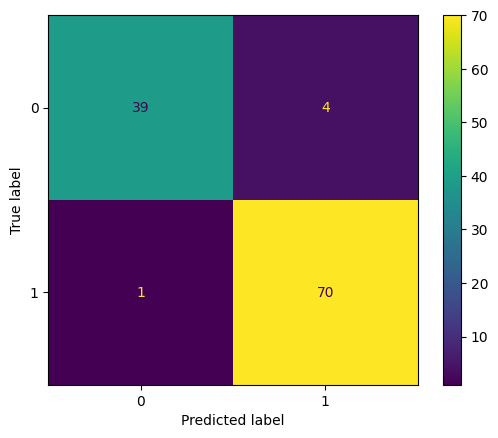

In [5]:
# Display classification report and confusion matrix
print(classification_report(y_test, y_pred, target_names=data.target_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


### ROC Curve
Finally, let's visualize the trade-off between true and false positive rates.

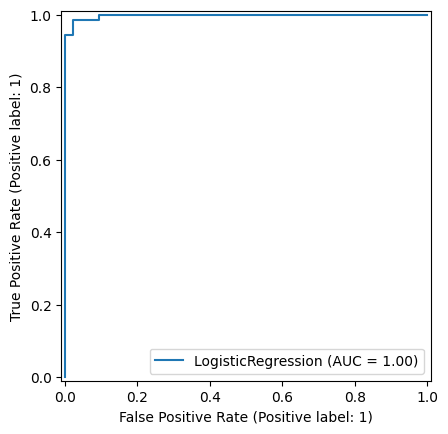

In [6]:
# ROC curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()
